# Applied Computational Intelligence - HW2

Authors
- Brewton Morais
- Lucas Abdalah

The goal of this work is propose an assessment of linear approaches to perform prediction in a Solubility Dataset.Ordinary Least Squares (OLS), $L_2$-Penalised Linear, Partial Least Squares (PLS), and Principal Component Regression (PCR) models.

## 0. Packages and data import

In [108]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from scipy.stats import zscore
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from math import sqrt
from pyexpat import model
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Solubility data divided into train and test sets
solX_test = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTestX.csv")
solX_train = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTrainX.csv")
solY_train = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTrainY.csv")
solY_test = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTestY.csv")

## 1. Data Analysis and Transformation

In [109]:
# concatenate data
X= pd.concat([solX_train, solX_test], axis=0)
Y = pd.concat([solY_train, solY_test], axis = 0)

# Target: solubility of chemical compound
data = pd.concat([X, Y], axis = 1)
data = data.rename(columns={'x':'solubility'})
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FP001,1267.0,0.486977,0.500028,0.000,0.0000,0.000,1.000,1.000
FP002,1267.0,0.550908,0.497598,0.000,0.0000,1.000,1.000,1.000
FP003,1267.0,0.438043,0.496342,0.000,0.0000,0.000,1.000,1.000
FP004,1267.0,0.571429,0.495067,0.000,0.0000,1.000,1.000,1.000
FP005,1267.0,0.588792,0.492247,0.000,0.0000,1.000,1.000,1.000
...,...,...,...,...,...,...,...,...
NumRings,1267.0,1.400947,1.281266,0.000,0.0000,1.000,2.000,7.000
HydrophilicFactor,1267.0,-0.040946,1.092327,-0.986,-0.7665,-0.338,0.312,13.483
SurfaceArea1,1267.0,35.537238,34.409726,0.000,9.2300,27.690,52.320,331.940
SurfaceArea2,1267.0,38.939013,37.047585,0.000,9.2300,32.260,57.200,331.940


In [110]:
print("N = {} Observations\n".format(len(data.axes[0])))
print("D = {} Predictor variables\n".format(len(data.columns)))
print("Predictor Names:\n{}\n".format(data.columns.to_list()))
print("Class-Counts:\n{}".format(data["solubility"].value_counts()))

N = 1267 Observations

D = 229 Predictor variables

Predictor Names:
['FP001', 'FP002', 'FP003', 'FP004', 'FP005', 'FP006', 'FP007', 'FP008', 'FP009', 'FP010', 'FP011', 'FP012', 'FP013', 'FP014', 'FP015', 'FP016', 'FP017', 'FP018', 'FP019', 'FP020', 'FP021', 'FP022', 'FP023', 'FP024', 'FP025', 'FP026', 'FP027', 'FP028', 'FP029', 'FP030', 'FP031', 'FP032', 'FP033', 'FP034', 'FP035', 'FP036', 'FP037', 'FP038', 'FP039', 'FP040', 'FP041', 'FP042', 'FP043', 'FP044', 'FP045', 'FP046', 'FP047', 'FP048', 'FP049', 'FP050', 'FP051', 'FP052', 'FP053', 'FP054', 'FP055', 'FP056', 'FP057', 'FP058', 'FP059', 'FP060', 'FP061', 'FP062', 'FP063', 'FP064', 'FP065', 'FP066', 'FP067', 'FP068', 'FP069', 'FP070', 'FP071', 'FP072', 'FP073', 'FP074', 'FP075', 'FP076', 'FP077', 'FP078', 'FP079', 'FP080', 'FP081', 'FP082', 'FP083', 'FP084', 'FP085', 'FP086', 'FP087', 'FP088', 'FP089', 'FP090', 'FP091', 'FP092', 'FP093', 'FP094', 'FP095', 'FP096', 'FP097', 'FP098', 'FP099', 'FP100', 'FP101', 'FP102', 'FP103', 'FP

In [111]:
data_slice = data.iloc[:, 208:229]
data_slice

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solubility
0,208.28,28,16,30,18,16,0,0,16,12,...,2,0,0,0,0,3,-0.856,25.78,25.78,-3.97
1,365.54,49,26,52,29,13,4,0,12,23,...,3,1,1,0,0,4,-0.370,52.19,80.43,-3.98
2,206.31,33,15,33,15,7,4,1,6,18,...,0,2,0,0,0,1,-0.330,37.30,37.30,-3.99
3,136.26,26,10,26,10,2,1,2,0,16,...,0,0,0,0,0,1,-0.960,0.00,0.00,-4.00
4,229.75,31,15,31,15,6,5,0,6,16,...,5,0,0,1,1,1,-0.069,53.94,53.94,-4.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,326.42,22,17,23,18,12,1,0,12,5,...,0,0,0,5,5,2,-0.692,0.00,0.00,-7.89
312,165.21,23,12,23,12,7,3,1,6,11,...,1,2,0,0,0,1,0.590,52.32,52.32,-2.32
313,188.25,26,14,27,15,8,1,2,6,12,...,2,1,0,0,0,2,-0.766,26.93,26.93,0.39
314,318.34,38,24,41,27,19,2,1,18,14,...,0,4,0,0,0,4,0.214,66.76,66.76,-2.90


In [112]:
df = data_slice.apply(zscore)
df.head(2)

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solubility
0,0.088597,0.218621,0.463018,0.325003,0.612634,1.905518,-0.906804,-0.812956,2.056022,-0.032277,...,1.036222,-0.910073,-0.322565,-0.3975,-0.475069,1.248519,-0.746458,-0.283672,-0.355332,-0.599951
1,1.726653,1.907605,2.031166,1.981154,2.093174,1.322825,0.760110,-0.812956,1.295222,1.482366,...,1.890414,-0.314483,1.851319,-0.3975,-0.475069,2.029305,-0.301361,0.484146,1.120380,-0.604821


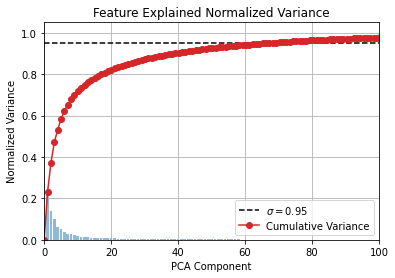

In [273]:
dataPCA = pd.concat([data.iloc[:, 0:208], df], axis = 1)
# dataPCA.head(2)

fig0= plt.figure(figsize=(6, 4))

 # Observe the variance retained in each PC
n_PCA = 229
pca = PCA(n_components=n_PCA) 
pca.fit_transform(dataPCA)

screeplot = np.zeros(n_PCA+1)
screeplot[1:n_PCA+1] = np.cumsum(pca.explained_variance_ratio_)

plt.axhline(y=0.95, color="black", linestyle="--")
plt.plot(np.linspace(0,len(pca.explained_variance_ratio_), n_PCA), screeplot[0:-1], color = "tab:red", marker = "o")
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_, color = "tab:blue", alpha = 0.5)

# plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
# plt.yticks(np.linspace(0, 1, n_PCA+1))
plt.xlim([0, 100])
plt.xlabel('PCA Component')
plt.ylabel('Normalized Variance')
plt.grid('minor')
plt.title('Feature Explained Normalized Variance')
plt.legend(["$\sigma = 0.95$","Cumulative Variance"])
plt.show()
fig0.savefig(r"figures/0-PCA-variance.pdf")
fig0.savefig(r"figures/0-PCA-variance.png")


PCA(n_components=229)

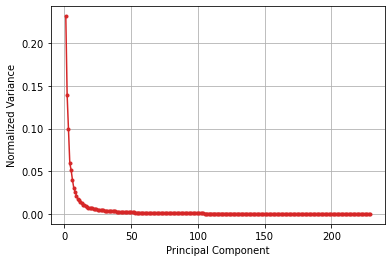

In [196]:
screeplot = np.zeros(n_PCA+1)
screeplot[1:n_PCA+1] = np.cumsum(pca.explained_variance_ratio_)


fig01 = plt.figure(figsize=(6, 4))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_, color = "tab:red", marker = ".")

# plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
# plt.yticks(np.linspace(0, 1, n_PCA+1))
# plt.xlim([0, n_PCA+0.5])
plt.xlabel('Principal Component')
plt.ylabel('Normalized Variance')
plt.grid('minor')
# plt.title('Feature Explained Normalized Variance')

fig01.savefig(r"figures/0-PCA-screeplot.pdf")
fig01.savefig(r"figures/0-PCA-screeplot.png")

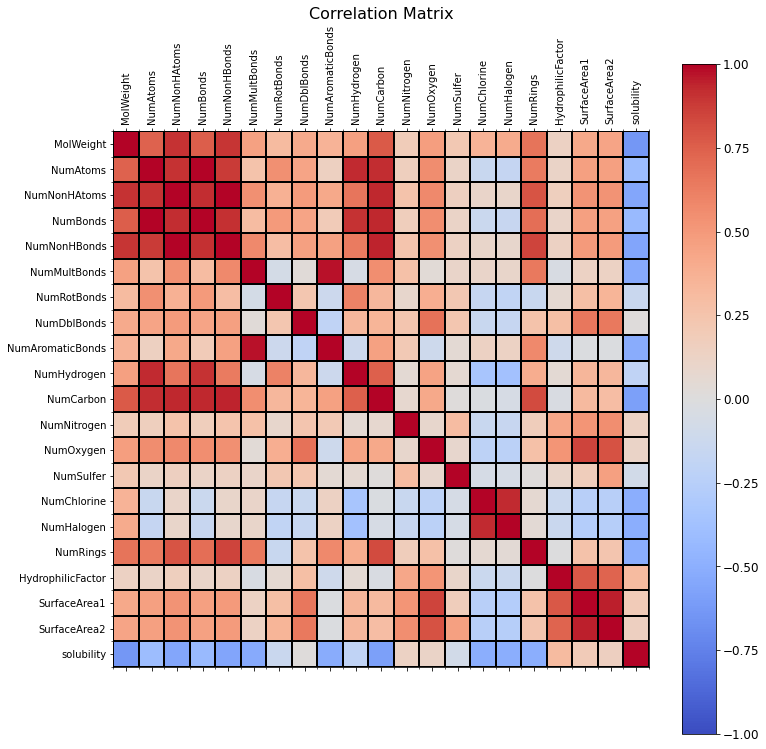

In [113]:
fig1 = plt.figure(figsize=(12, 12))
plt.matshow(df.corr(), fignum=fig1.number, cmap="coolwarm", interpolation='none')
plt.xticks(range(len(df.columns)),df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
cb = plt.colorbar()
plt.clim(-1,1)
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16)

# Gridlines based on minor ticks
ax = plt.gca()
ax.set_xticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.show()

fig1.savefig(r"figures/1-correlation_matrix.pdf")
fig1.savefig(r"figures/1-correlation_matrix.png")

Predictor Pairs with correlation $|p| \geq $ 0.9
14.0

Predictor Pairs with correlation $|p| \geq $ 0.75
25.0



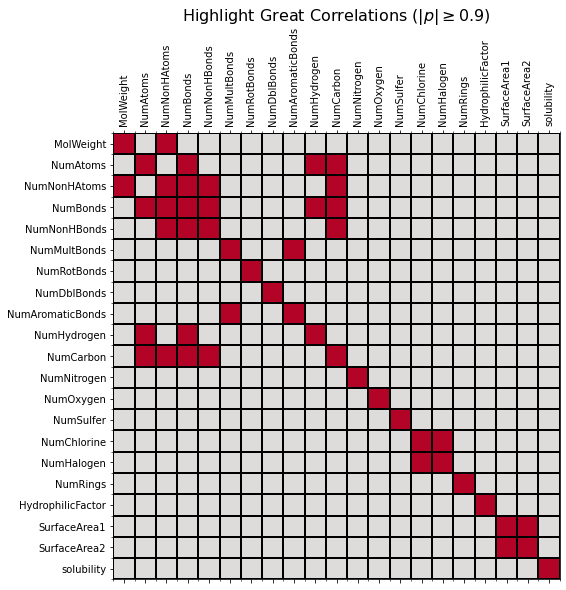

In [114]:
fig2 = plt.figure(figsize=(8, 8))
thre = 0.9
plt.matshow((df.corr() > thre) + (df.corr() < -thre), fignum=fig2.number, cmap="coolwarm")
plt.clim(-1,1)
plt.title('Highlight Great Correlations $(|p|\geq {})$'.format(thre), fontsize=16)
plt.xticks(range(len(df.columns)),df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
cb.ax.tick_params(labelsize=12)

print("Predictor Pairs with correlation $|p| \geq $ {0}\n{1}\n".format(thre, np.sum((np.sum(df.corr() > thre) - 1))/2))
thre2 = 0.75
print("Predictor Pairs with correlation $|p| \geq $ {0}\n{1}\n".format(thre2, np.sum((np.sum(df.corr() > thre2) - 1))/2))

# Gridlines based on minor ticks
ax = plt.gca()
ax.set_xticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.show()

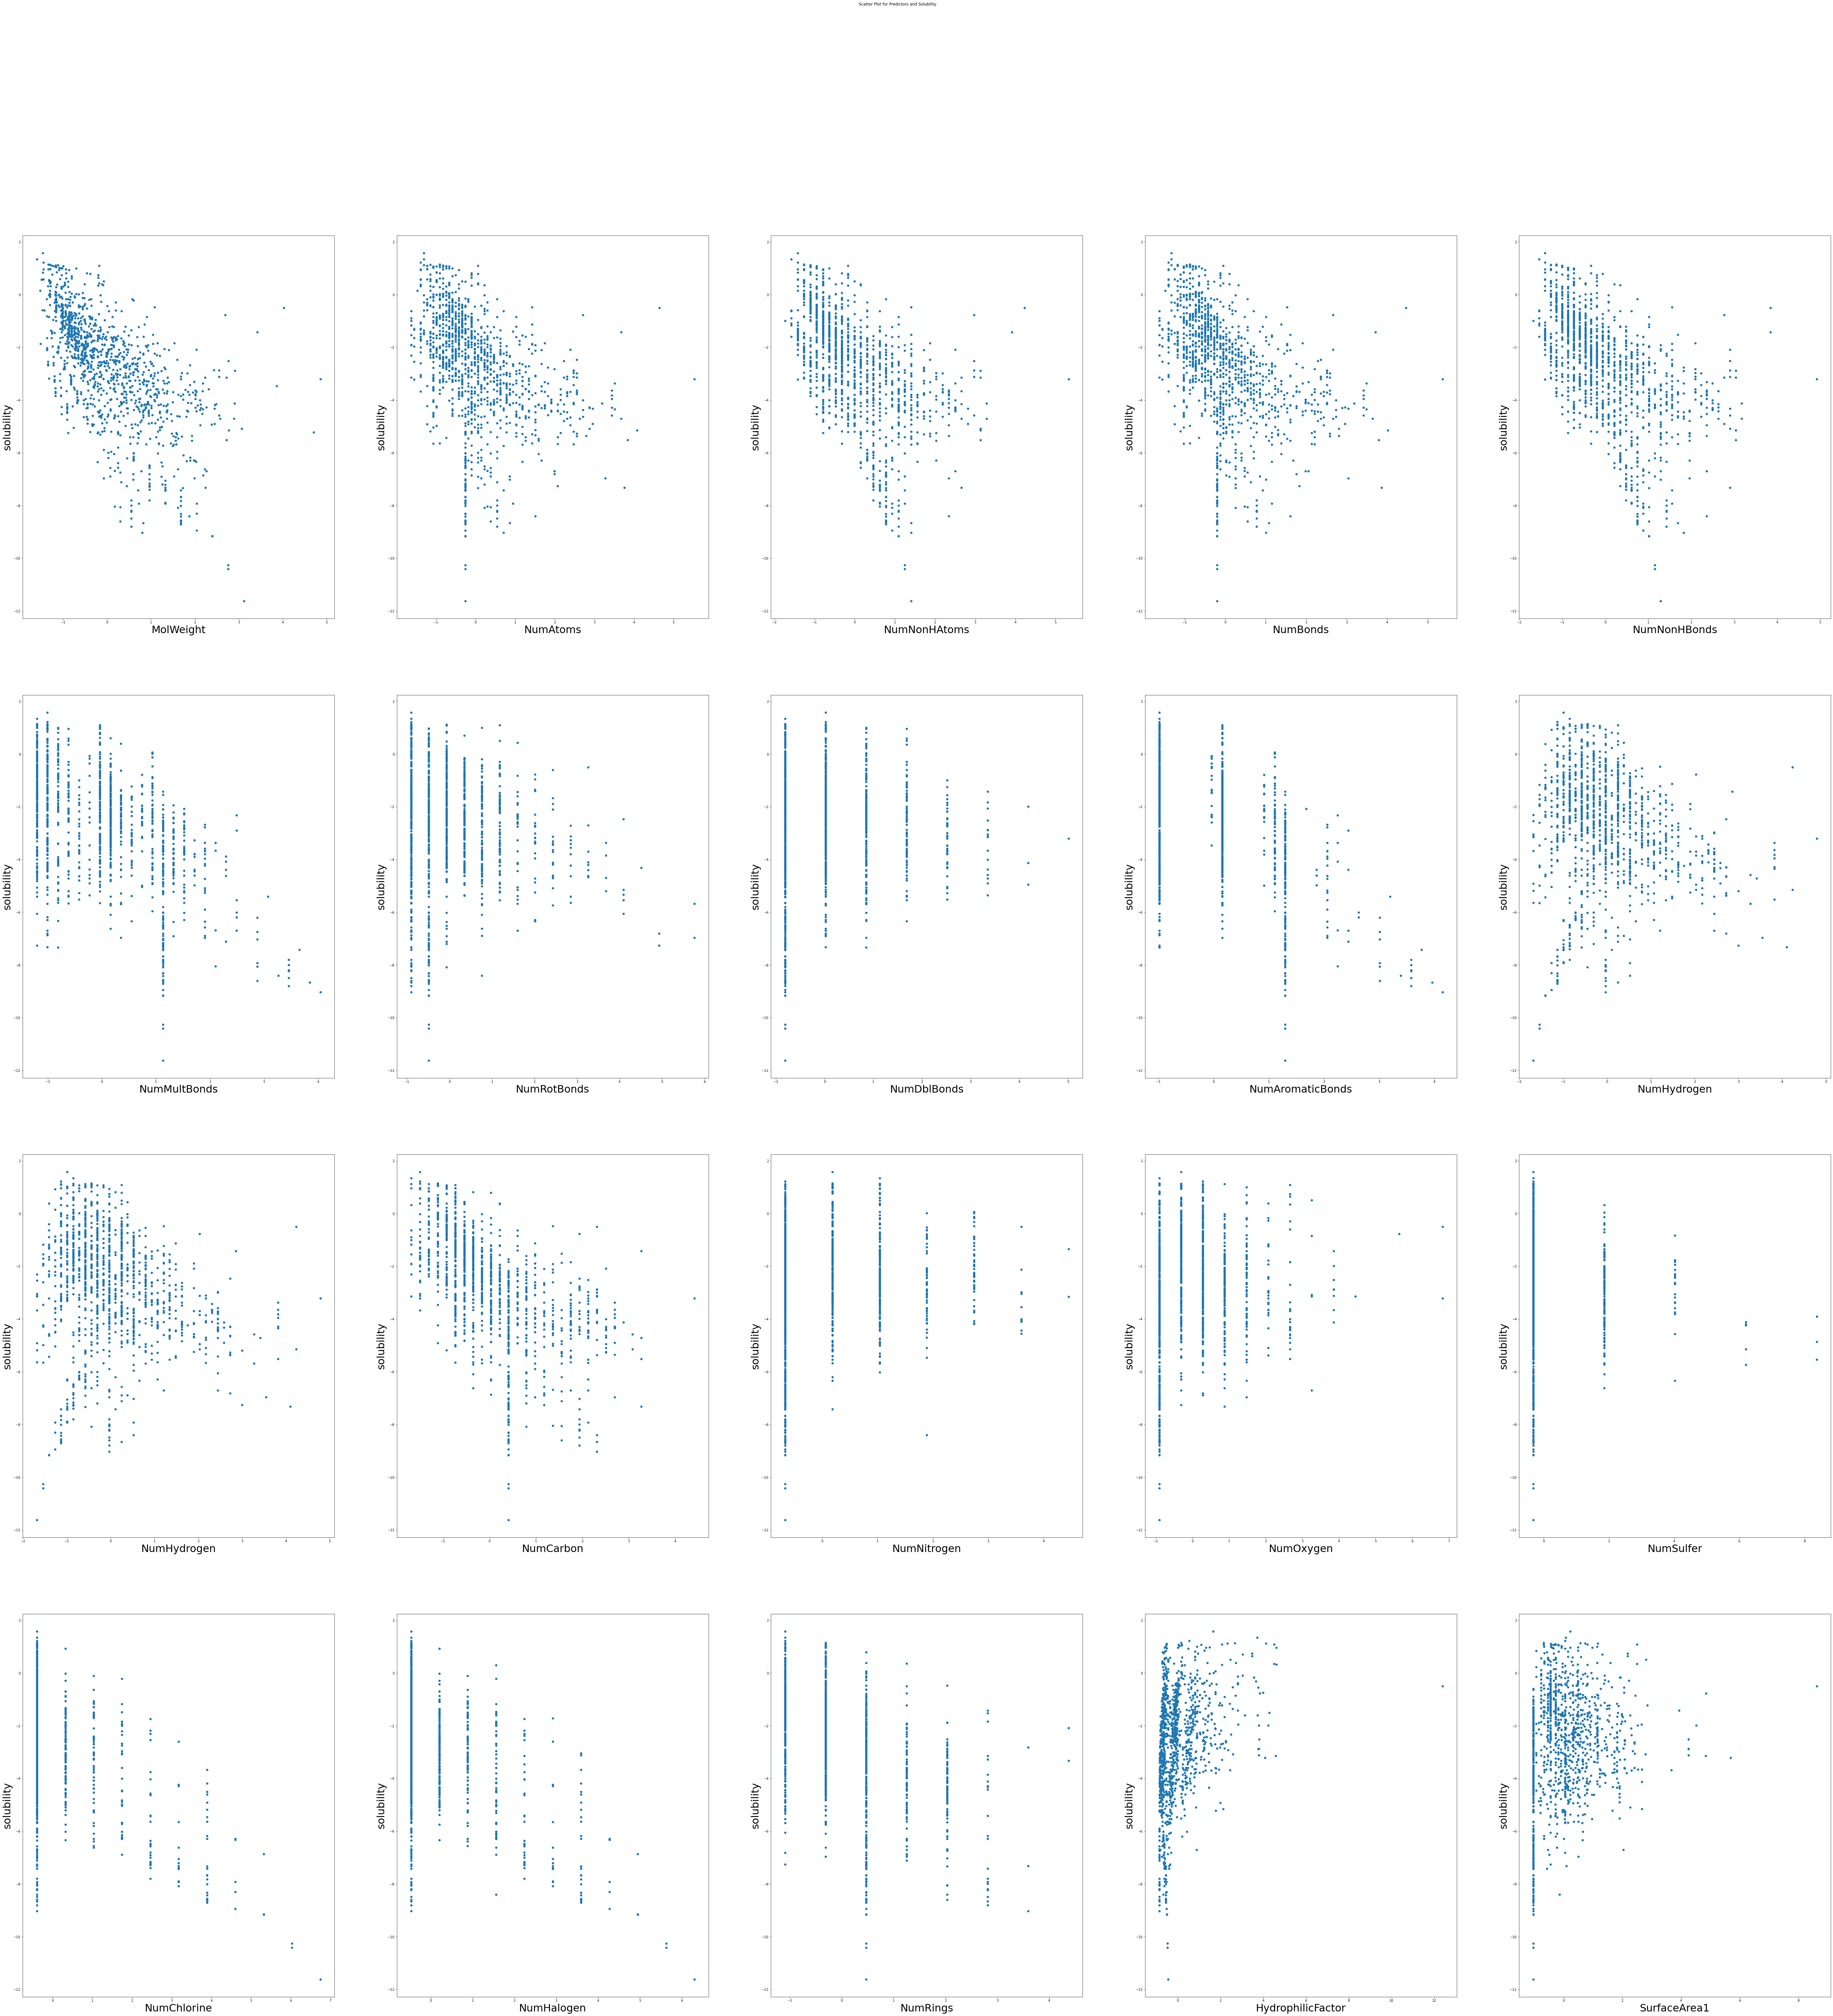

In [115]:
labels = df.columns
nrows, ncols = 4, 5
fig3, axes3 = plt.subplots(nrows, ncols, figsize = (100,100))

for i in range(nrows): 
    for j in range(ncols): 
        ax = axes3[i]
        # We are looking for a linear relationship between predictors and target
        if i==0:
            ax[j].scatter(df[labels[j]], Y)
            ax[j].set_xlabel(df.columns[j], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
        elif i==1:
            ax[j].scatter(df[labels[j+5]], Y)
            ax[j].set_xlabel(df.columns[j+5], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
        elif i==2:
            ax[j].scatter(df[labels[j+9]], Y)
            ax[j].set_xlabel(df.columns[j+9], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
        else:
            ax[j].scatter(df[labels[j+14]], Y)    
            ax[j].set_xlabel(df.columns[j+14], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
            
fig3.suptitle('Scatter Plot for Predictors and Solubility')        
plt.show()

## 2. Train/Test Split

In [303]:
# X =  dataPCA.iloc[:, 0:229]# Features 
X =  df.iloc[:, 0:20]# Features 
y = df['solubility'] # Target

In [304]:
# Split data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [305]:
print("Predictor Mean: \n{}\n".format(df.mean(axis = 0).to_dict()))
print("Predictor Standard Deviation: \n{}\n".format(df.std(axis = 0).to_dict()))
print("Predictor Skewness: \n{}\n".format(df.skew(axis = 0).to_dict()))

Predictor Mean: 
{'MolWeight': 1.8822092003905575e-16, 'NumAtoms': 1.8822092003905575e-16, 'NumNonHAtoms': -3.7398830853197857e-16, 'NumBonds': 2.9267126300300103e-16, 'NumNonHBonds': 1.9680828045052105e-16, 'NumMultBonds': 1.7792485015796215e-16, 'NumRotBonds': 3.1124800185229327e-16, 'NumDblBonds': -4.640679667257166e-16, 'NumAromaticBonds': 1.9389909304582053e-15, 'NumHydrogen': 1.5667551444591791e-16, 'NumCarbon': 3.0493892073366574e-17, 'NumNitrogen': -1.770047758281623e-16, 'NumOxygen': 1.5597450543273707e-16, 'NumSulfer': 1.1813754394630118e-15, 'NumChlorine': -5.645751339905196e-16, 'NumHalogen': -2.6106451912120986e-15, 'NumRings': 9.84742411265786e-16, 'HydrophilicFactor': 5.238289850993832e-16, 'SurfaceArea1': -4.118427952437439e-17, 'SurfaceArea2': 2.1030270395425222e-17, 'solubility': 2.322092356161535e-16}

Predictor Standard Deviation: 
{'MolWeight': 1.0003948667478664, 'NumAtoms': 1.0003948667478693, 'NumNonHAtoms': 1.000394866747866, 'NumBonds': 1.0003948667478673, 'Nu

In [306]:
print('Train/Test split proportion: ')
print(f'Train predictors w.r.t dataset: {np.round(len(X_train.axes[0])/len(df.axes[0])*100):.2f}%.')
print(f'Test predictors w.r.t dataset:  {np.round(len(X_test.axes[0])/len(df.axes[0])*100):.2f}%.')

Train/Test split proportion: 
Train predictors w.r.t dataset: 75.00%.
Test predictors w.r.t dataset:  25.00%.


## 3. Ordinary Linear Model (OLS)

In [307]:
###### Linear Regression #######
# Create a regression model 
model = linear_model.LinearRegression()

# Fit model in training data 
model.fit(X_train, y_train)

# Compute the predicted target from the model given input X_test
y_pred = model.predict(X_test) # y = beta0 + beta1*X_1

In [308]:
e = np.array(y_test - y_pred) # Residuals
print(f'Residuals:\n{e}\n')
RSS = np.sum(e**2) # Root Square Sum of residuals
print(f'RSS = {RSS:.3f}')

Residuals:
[ 0.1024857   0.0946405   0.156683   -0.10023847  0.43062154  0.38489115
 -0.51809761  0.34077189  0.39936358  0.25723047  0.39470021 -0.08815661
  0.51582236 -0.84902525 -0.58687107  0.2808689  -0.43010911  0.20598373
 -0.32174065  0.82008658  0.65092107  0.17567636  0.64856332 -0.88628902
  0.3228285  -0.44650236  0.98548128 -0.26952498 -0.02645692  0.15595873
 -0.15641899 -0.07722233  0.34846359  0.00305273 -0.04812321 -0.68780304
 -0.08384821  0.28742263  0.16708102 -0.74121039 -1.50570692 -0.22337188
 -0.29576509 -0.11877457  0.02408861 -0.40067672 -0.14641005 -0.52080159
  0.70220416 -1.02007394 -1.34695844 -0.12946499  0.11044076  1.00731094
  0.02059044 -0.41994354 -0.29405197 -0.89004375  0.1936545   0.04709504
  0.15372448 -1.31701529  0.00292435  0.21970633 -0.03007476 -0.09894251
 -0.06291549 -0.26654913 -0.06578698  0.05451057  0.61253524  0.15161447
  0.49329463 -0.07055362 -0.1338396  -0.1998097  -0.41071085  0.65011446
 -0.01446868  0.02413741  0.30869785 -0.

In [309]:
# The coefficients
roundedCoeff = np.round(model.coef_, decimals = 3)
# Build a dataframe containing the features and their respectives coefficients
coef = pd.DataFrame(roundedCoeff, columns=['Coefficients'], index=X_train.columns)
coef

,Coefficients
MolWeight,-0.442
NumAtoms,0.152
NumNonHAtoms,1.819
NumBonds,0.077
NumNonHBonds,1.443
NumMultBonds,-3.808
NumRotBonds,-0.169
NumDblBonds,0.345
NumAromaticBonds,2.817
NumHydrogen,-1.336


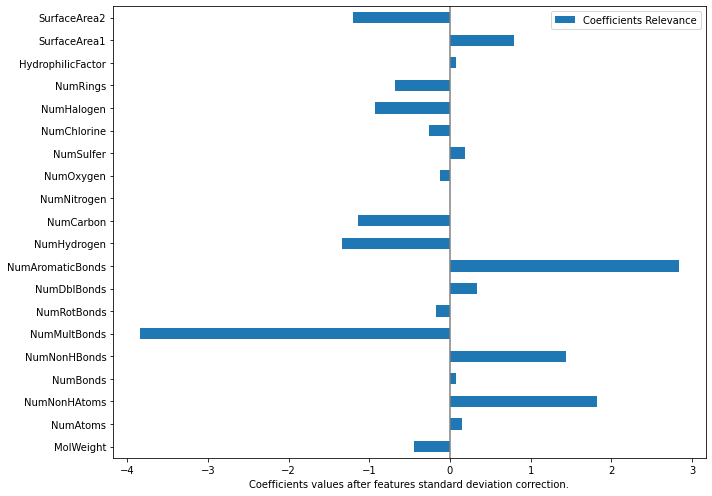

In [310]:
coef_scaled = pd.DataFrame(roundedCoeff*X_train.std(axis=0), columns = ['Coefficients Relevance'], index = X.columns[:])

fig3 = coef_scaled.plot(kind = 'barh', figsize=(10,7)).get_figure()
# plt.title('Linear Regression')
plt.xlabel('Coefficients values after features standard deviation correction.')
plt.axvline(x = 0, color = '.5')
plt.tight_layout()

# fig3.savefig(r"figures/2-linear-regression-coefficients.pdf")
# fig3.savefig(r"figures/2-linear-regression-coefficients.png")

In [311]:
# The mean squared error
print(f'\nIntercept: {model.intercept_:.3f}.')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
MSE = mean_squared_error(y_test, y_pred)
#diff = (Y_test-Y_pred)**2
#MSE_manual = np.sum(diff)/143
print(f"\nMean squared error (MSE)= {MSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
RMSE = sqrt(MSE)
print(f"\nRoot Mean Squared Error (RMSE)= {RMSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#print(f"\nMean squared error manual = {MSE_manual:.3f}.")
# The coefficient of determination: 1 is perfect prediction
R2Score = r2_score(y_test, y_pred)
print(f"\nCoefficient of determination (R2): {R2Score:.3f}. Thus, the model can represent ~ {np.round(R2Score, decimals = 2)*100}% of the variation in the outcome.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#  This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
print("\nExplain variance score =", np.round(explained_variance_score(y_test, y_pred), 2))
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####


Intercept: -0.005.
----------------------------------------------------------------------------------------------------------------------------------------

Mean squared error (MSE)= 0.224.
----------------------------------------------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE)= 0.474.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficient of determination (R2): 0.776. Thus, the model can represent ~ 78.0% of the variation in the outcome.
----------------------------------------------------------------------------------------------------------------------------------------

Explain variance score = 0.78
----------------------------------------------------------------------------------------------------------------------------------------


In [312]:
N_predictors = len(X_test.axes[1])

# Arrays to store the coefficients
m = np.zeros((N_predictors)) # slope of line
b = np.zeros((N_predictors)) # intercept of line 

for i in range(N_predictors):
    # Fit a line in the data, using the predicted data to estimate the coefficients 
    m[i], b[i] = np.polyfit(X_test[X_test.columns[i]], y_pred, 1) # setting model parameters 

C:\Users\LUCASA~1\AppData\Local\Temp/ipykernel_15700/3381947472.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


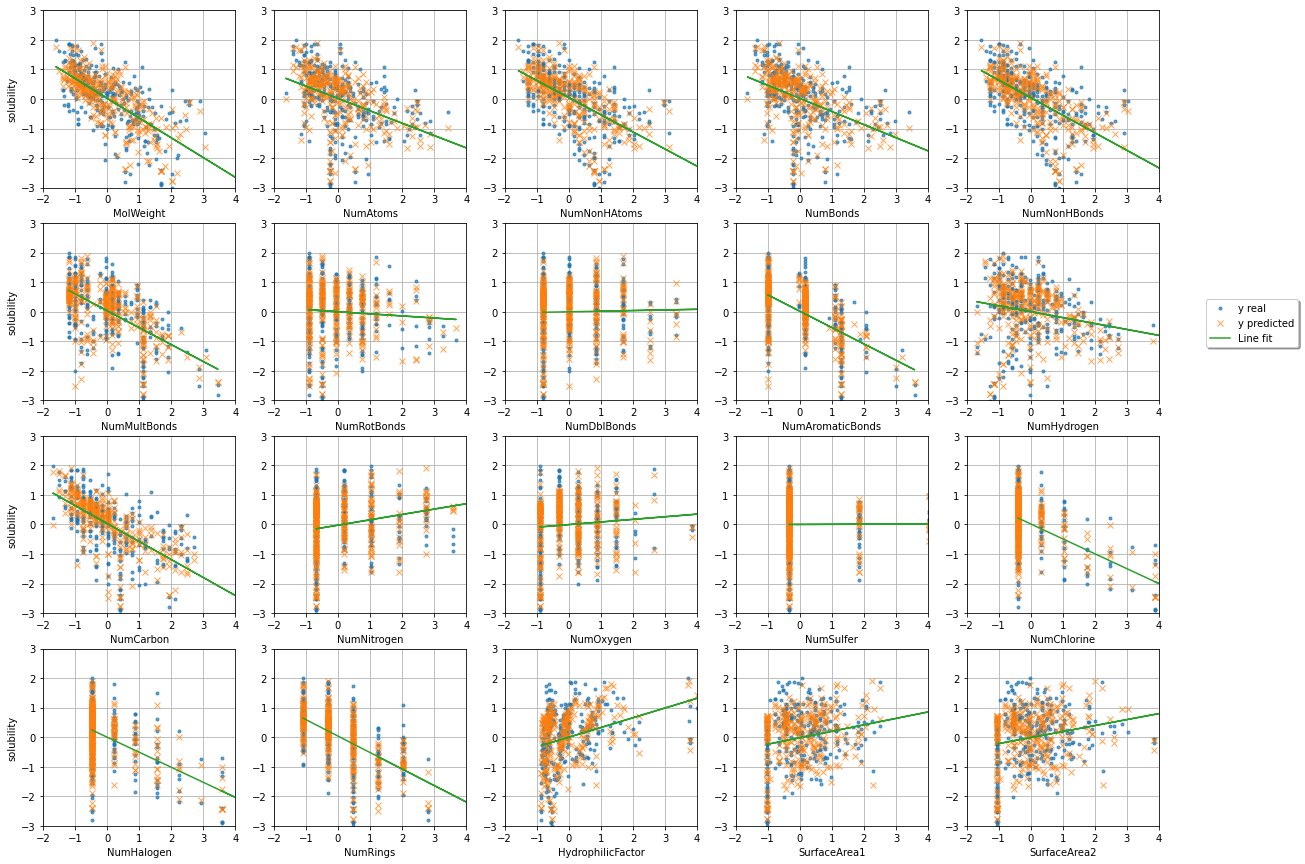

In [313]:
i = 0
bottom = -3
top = 3
nrow = 4
ncol = 5
fig3, axes3 = plt.subplots(nrow, ncol, figsize = (20, 15))
for row_i in range(nrow):
    for col_i in range(ncol):
        lineFit=m[i]*X_test[X_test.columns[i]]+b[i]
        ax3 = axes3[row_i]
        ax3[col_i].plot(X_test[X_test.columns[i]], y_test, '.', label = 'y real', alpha = .7)
        ax3[col_i].plot(X_test[X_test.columns[i]], y_pred, 'x', label = 'y predicted', alpha = .7)
        ax3[col_i].plot(X_test[X_test.columns[i]], lineFit, '-', label = 'Line fit')
        ax3[col_i].set_xlabel(X_test.columns[i])
        ax3[col_i].set_xlim(-2, 4)
        ax3[col_i].set_ylim(bottom, top)
        ax3[col_i].grid()
        i += 1
for row in range(nrow):
    axes3[row][0].set_ylabel('solubility')
# fig3.suptitle('Linear Regression')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.75, 3), frameon = True, shadow = True)
plt.tight_layout()

plt.show()

# fig3.savefig(r"figures/2-linear-regression.pdf")
# fig3.savefig(r"figures/2-linear-regression.png")

## 4. K-Fold Cross-Validation 

In [314]:
scores5_R2 = cross_val_score(model, X, y, scoring ='r2', cv=5) # 5-Fold Cross-Validation R2 validation
print("\nFor 5-fold Cross-Validation with R2 scoring: ")
print(f"Accuracy: {scores5_R2.mean():.3f}\nStandard deviation: {scores5_R2.std():.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####
scores10_R2 = cross_val_score(model, X, y, scoring ='r2', cv=10) # 10-Fold Cross-Validation R2 validation
print("\nFor 10-fold Cross-Validation with R2 scoring: ")
print(f"Accuracy: {scores10_R2.mean():.3f}\nStandard deviation: {scores10_R2.std():.3f}.")


For 5-fold Cross-Validation with R2 scoring: 
Accuracy: -0.328
Standard deviation: 1.123.
----------------------------------------------------------------------------------------------------------------------------------------

For 10-fold Cross-Validation with R2 scoring: 
Accuracy: -1.785
Standard deviation: 2.993.


## 5. Ridge Regression

In [315]:
# Initialize a set of candidates alphas (lambda parameter)
alphas = 10**np.linspace(-3,3,100)*0.5

# Create a Ridge Regression Model
ridge = Ridge()
# Create an empty list to store RMSEs for each candidate alpha 
rmseRidge = []
weights = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    weights.append(ridge.coef_)
    rmseRidge.append(sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

Lambda that minimizes the error: 500.0.


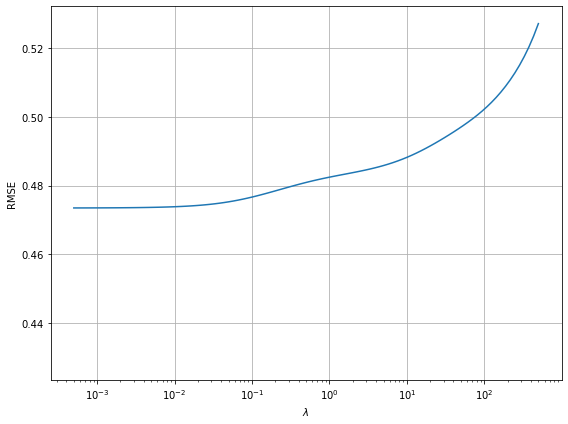

In [316]:
rmseRidge = np.array(rmseRidge) # convert list to array type 

# Setting inferior and superior limits of plot 
inf_lim = np.min(rmseRidge)-0.05 
sup_lim = np.max(rmseRidge)+0.005

fig4 = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.plot(alphas, rmseRidge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylim(inf_lim, sup_lim)
plt.ylabel('RMSE')
# plt.title('Cross-Validation log-scale')
plt.grid()
plt.tight_layout()

print(f'Lambda that minimizes the error: {ridge.alpha}.')

# fig4.savefig(r"figures/3-lambda-ridge.pdf")
# fig4.savefig(r"figures/3-lambda-ridge.png")

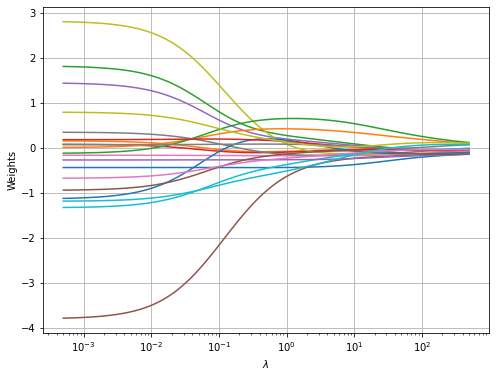

In [317]:
fig5 = plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, weights)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
#plt.ylim(inf_lim, sup_lim)
plt.ylabel('Weights')
# plt.title('Cross-Validation log-scale')
plt.grid()
plt.show()

# fig5.savefig(r"figures/3-weights-ridge.pdf")
# fig5.savefig(r"figures/3-weights-ridge.png")


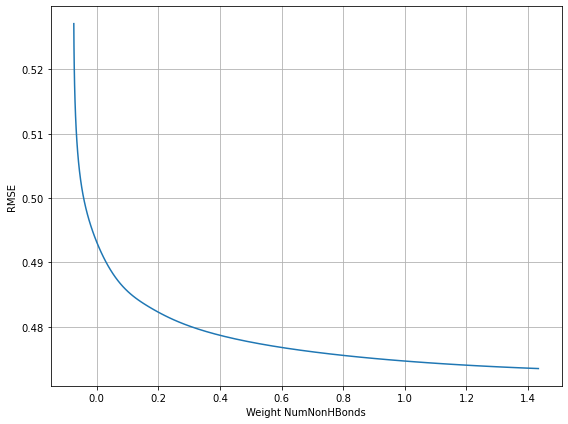

In [318]:
weights = np.array(weights)

fig6 = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.plot(weights[:,4], rmseRidge)

plt.xlabel('Weight NumNonHBonds')
#plt.ylim(inf_lim, sup_lim)
plt.ylabel('RMSE')
# plt.title('Weight decay')
plt.tight_layout()

plt.grid()

plt.show()

# fig6.savefig(r"figures/3-weights-decay.pdf")
# fig6.savefig(r"figures/3-weights-decay.png")

In [319]:
###### Ridge Linear Regression #######
# Fit model in training data 
ridge.fit(X_train, y_train)

# Compute the predicted target from the model given input X_test
y_pred_ridge = model.predict(X_test) # y = beta0 + beta1*X_1

In [320]:
# The mean squared error
print('**************** RIDGE LINEAR REGRESSION **************** ')
print(f'\nIntercept: {ridge.intercept_:.3f}.')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
ridge_MSE = mean_squared_error(y_test, y_pred_ridge)
print(f"\nMean squared error (MSE)= {ridge_MSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
ridge_RMSE = sqrt(MSE)
print(f"\nRoot Mean Squared Error (RMSE)= {ridge_RMSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#print(f"\nMean squared error manual = {MSE_manual:.3f}.")
# The coefficient of determination: 1 is perfect prediction
ridge_R2Score = r2_score(y_test, y_pred_ridge)
print(f"\nCoefficient of determination (R2): {ridge_R2Score:.3f}. Thus, the model can represent ~ {np.round(ridge_R2Score, decimals = 2)*100}% of the variation in the outcome.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#  This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
print("\nExplain variance score =", np.round(explained_variance_score(y_test, y_pred_ridge), 2))
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####

**************** RIDGE LINEAR REGRESSION **************** 

Intercept: -0.010.
----------------------------------------------------------------------------------------------------------------------------------------

Mean squared error (MSE)= 0.224.
----------------------------------------------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE)= 0.474.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficient of determination (R2): 0.776. Thus, the model can represent ~ 78.0% of the variation in the outcome.
----------------------------------------------------------------------------------------------------------------------------------------

Explain variance score = 0.78
----------------------------------------------------------------------------------------------------------------------------------------


## 6. Principal Component Regression (PCR)

In [364]:
# X =  dataPCA.iloc[:, 0:229]# Features 
X =  dataPCA.iloc[:, 0:229] # Features 
y = dataPCA['solubility'] # Target

# Split data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

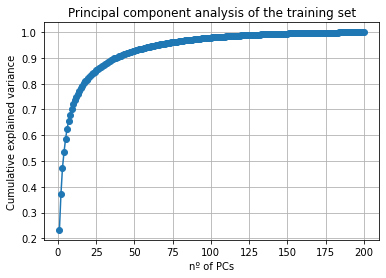

In [365]:
# Principal component analysis of the training set:
nPCA = 200
pca = PCA(n_components=nPCA) 
pca.fit(X_train)
plt.figure()
plt.title('Principal component analysis of the training set')
plt.xlabel('nº of PCs')
plt.ylabel('Cumulative explained variance')
plt.plot(np.arange(nPCA)+1, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.grid()
plt.show()

In [414]:
nPCR = np.arange(2, 21)
RMSE_PCR = [];

for iiPCR in nPCR:
  pca = PCA(n_components=iiPCR) # PCA components
  # Transforming the training set:
  pcr_train = pca.fit_transform(X_train)[:,0:iiPCR]
  pcr_test = pca.fit_transform(X_test)
  # Create a new linear regression model:
  pcr = linear_model.LinearRegression()

  # We now use the Principal Components as training set
  pcr.fit(pcr_train, y_train)
  y_pred_pcr = pcr.predict(pca.fit_transform(pcr_test))

  # Compute the RMSE and the R2 scores using scikit-learn built-in functions
  mse_pcr = mean_squared_error(y_test, y_pred_pcr)
  rmse_pcr = np.sqrt(mean_squared_error(y_test, y_pred_pcr))
  RMSE_PCR.append(rmse_pcr)
  r2_pcr = r2_score(y_test,y_pred_pcr)
  pcr_coeff = pcr.coef_

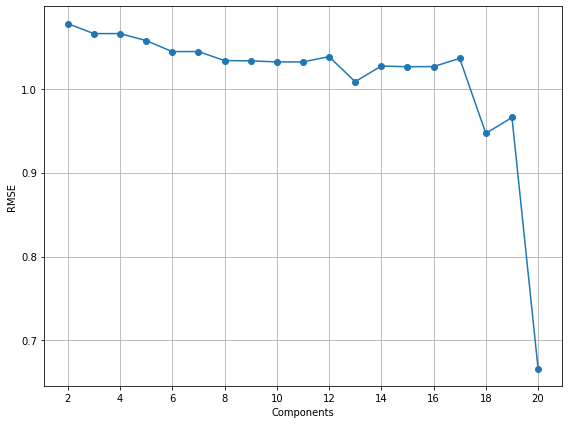

In [416]:
fig11 = plt.figure(figsize=(8, 6))

# plt.title('Principal component reg of the training set')
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.xticks(np.arange(2, 21, 2))
plt.plot(nPCR, RMSE_PCR[::-1], 'o-')
plt.grid()
plt.tight_layout()
plt.show()

fig11.savefig(r"figures/5-PCR-RMSE.pdf")
fig11.savefig(r"figures/5-PCR-RMSE.png")

In [417]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([28.1 , 45.35, 56.63, 63.71, 70.4 ])

In [418]:
# The mean squared error
print(f'*********** PCR ***********')
print(f'\nIntercept: {pcr.intercept_:.3f}.')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f'\nCoefficients: \n[{pcr_coeff}].')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f"\nMean squared error (MSE)= {mse_pcr:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f"\nRoot Mean Squared Error (RMSE)= {rmse_pcr:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#print(f"\nMean squared error manual = {MSE_manual:.3f}.")
# The coefficient of determination: 1 is perfect prediction
print(f"\nCoefficient of determination (R2): {r2_pcr:.3f}. Thus, the model can represent ~ {np.round(r2_pcr, decimals = 2)*100}% of the variation in the outcome.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#  This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
print("\nExplain variance score =", np.round(explained_variance_score(y_test, y_pred_pcr), 2))
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####

*********** PCR ***********

Intercept: -0.018.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficients: 
[[-0.09622588 -0.25080746 -0.19825777 -0.08774699 -0.15546142 -0.09624001
  0.00402346 -0.05682402  0.19928962  0.16415792  0.12093909  0.00436636
 -0.10879961  0.02618542 -0.11110126 -0.04818555  0.12686046 -0.15168656
  0.00180813  0.18916816]].
----------------------------------------------------------------------------------------------------------------------------------------

Mean squared error (MSE)= 1.161.
----------------------------------------------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE)= 1.078.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficient of determination (R2): -0.246. Thus, the model can re

## 7. Partial Least Squares (PLS)

In [396]:
nPLS = 10
pls = PLSRegression(n_components=nPLS)

# Train model with training data 
pls.fit(X_train, y_train)

# Estimate the outcome using the transformed validation set: real data = mos_Y
y_pred_pls = pls.predict(X_test)

# Compute the RMSE and the R2 scores using scikit-learn built-in functions
mse_pls=mean_squared_error(y_test, y_pred_pls)
rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
r2_pls = r2_score(y_test,y_pred_pls)
pls_coeff = pls.coef_

In [419]:
nPLS = np.arange(2, 21)
RMSE_PLS = []

for iiPLS in nPLS:
  pls = PLSRegression(n_components=iiPLS)
  # Train model with training data 
  pls.fit(X_train, y_train)

  # Estimate the outcome using the transformed validation set: real data = mos_Y
  y_pred_pls = pls.predict(X_test)

  # Compute the RMSE and the R2 scores using scikit-learn built-in functions
  mse_pls=mean_squared_error(y_test, y_pred_pls)
  rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
  r2_pls = r2_score(y_test,y_pred_pls)
  pls_coeff = pls.coef_  
  RMSE_PLS.append(rmse_pls)


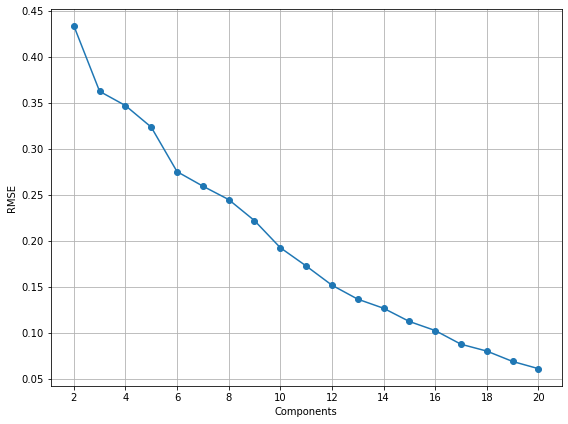

In [422]:
fig12 = plt.figure(figsize=(8, 6))

# plt.title('Principal component reg of the training set')
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.plot(nPLS, RMSE_PLS, 'o-')
plt.xticks(np.arange(2, 21, 2))
plt.grid()
plt.tight_layout()
plt.show()

fig12.savefig(r"figures/5-PLS-RMSE.pdf")
fig12.savefig(r"figures/5-PLS-RMSE.png")

In [397]:
# The mean squared error
print(f'*********** PLS *************')
print(f'\nCoefficients: \n[{pls_coeff.T}].')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f"\nMean squared error (MSE)= {mse_pls:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f"\nRoot Mean Squared Error (RMSE)= {rmse_pls:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#print(f"\nMean squared error manual = {MSE_manual:.3f}.")
# The coefficient of determination: 1 is perfect prediction
print(f"\nCoefficient of determination (R2): {r2_pls:.3f}. Thus, the model can represent ~ {np.round(r2_pls, decimals = 2)*100}% of the variation in the outcome.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#  This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
print("\nExplain variance score =", np.round(explained_variance_score(y_test, y_pred_pls), 2))
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####

*********** PLS *************

Coefficients: 
[[[ 1.79354523e-02  1.28481203e-02 -4.71953557e-03 -3.88957169e-03
  -1.60356501e-02 -5.62111800e-04 -1.63114868e-02 -1.41581085e-02
   4.82003314e-03  7.16506190e-03  6.57181050e-03  6.04025842e-04
  -2.21784518e-02 -1.09093547e-02 -5.00436250e-03 -1.61907477e-02
  -1.63631867e-02 -1.48575810e-02  3.43188293e-04  1.05266527e-03
   2.72460680e-02  2.32080060e-02 -1.46735509e-02 -5.21405662e-03
  -5.43705182e-03  1.28281039e-02  2.52213247e-02  1.05298480e-02
  -1.12065194e-02 -7.07759493e-03  2.66576456e-02  8.61432633e-04
   1.80685955e-02 -2.25538308e-02  7.35914483e-03 -1.99090895e-02
   1.63861737e-02  1.21813904e-02 -4.92877509e-02  2.41209157e-02
  -1.30637380e-02  8.67522296e-04  3.13124498e-02 -2.62091848e-02
   1.57558741e-02  2.08397046e-02 -1.88938323e-02  2.16804030e-03
   3.67789182e-02 -6.69678026e-03  6.58736853e-03  9.83024280e-03
  -1.12005151e-03 -3.29146153e-02 -2.98868630e-03 -2.31566856e-02
  -2.03545849e-02  4.00299897

## 8. Model Performance Comparison 

RMSE difference: [0.060958371593401395, 0.4735083230898483, 1.0776762153575745, 0.4735083230898483]


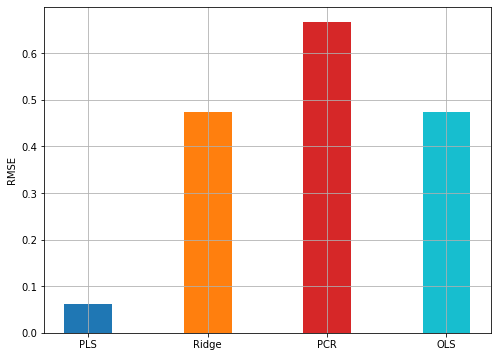

In [426]:
# Comparsion os the models - RMSE:
fig13 = plt.figure(figsize=(8, 6))
print(f'''RMSE difference: {[rmse_pls, ridge_RMSE, rmse_pcr, RMSE]}''')
# plt.title('Comparsion of the models RMSE w.r.t test set')
plt.bar([0,1,2,3], [rmse_pls, ridge_RMSE, RMSE_PCR[0], RMSE], 0.4, color=['C0', 'C1', 'C3', 'C9'],
                            tick_label=['PLS', 'Ridge','PCR', 'OLS'])
plt.ylabel('RMSE')
#plt.ylim([1.08445, 1.084465])#[1.086066, 1.08607])
plt.grid()
plt.show()

fig13.savefig(r"figures/5-summary.pdf")
fig13.savefig(r"figures/6-summary.png")